In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as scs
%matplotlib inline

# Value at Risk

In [2]:
S0 = 100
rate = 0.05
sigma = 0.25
T = 30 / 365
I = 100000
ST = S0 * np.exp((rate - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

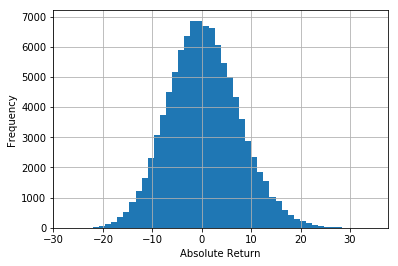

In [3]:
# calculate the absolute return, sort them to calculate the VaR
gainLoss = np.sort(ST - S0)
plt.hist(gainLoss, bins=50)
plt.xlabel('Absolute Return')
plt.ylabel('Frequency')
plt.grid(True)

In [4]:
# calculate the VaR at the different confidence level
confidences = [0.01, 0.1, 1, 2.5, 5, 10]
VaR = scs.scoreatpercentile(gainLoss, confidences)

print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for confis, var in zip(confidences, VaR):
    print("%16.2f %16.3f" % (100 - confis, - var))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.882
           99.90           19.699
           99.00           15.246
           97.50           13.025
           95.00           10.962
           90.00            8.623


# Conditional VaR

In [5]:
confidences = [0.01, 0.1, 1, 2.5, 5, 10]
VaR = scs.scoreatpercentile(gainLoss, confidences)
CVaR = [gainLoss[gainLoss < var].mean() for var in VaR]

print("%16s %16s" % ('Confidence Level', 'Conditional Value-at-Risk'))
print(33 * '-')
for confis, cvar in zip(confidences, CVaR):
    print("%16.2f %16.3f" % (100 - confis, - cvar))

Confidence Level Conditional Value-at-Risk
---------------------------------
           99.99           24.298
           99.90           21.074
           99.00           17.242
           97.50           15.288
           95.00           13.594
           90.00           11.645


Conditional VaR is the average of the loss excess VaR at the same confidence level.
As we can see above, the absolute CVaR is greater than VaR

# Credit Value Adjustment for Stock

In [6]:
S0 = 100.
rate = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((rate - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

In [7]:
# Loss given default
L = 0.5
# probability of default yearly
p = 0.01

# Possion distribution, to evaluate the prob for each path and transit to corresponding time T
D = np.random.poisson(p * T, I)
# if the value is greater than 1, 100% default, set it to 1
D = np.where(D > 1, 1, D)

In [8]:
# No default, discount and average of paths
V0 = np.exp(- rate * T) * np.sum(ST) / I
# present value of loss, discount and average of paths
CVA = np.exp(- rate * T) * np.sum(ST * L * D) / I
# value after credit risk adjustment
V1 = np.exp(- rate * T) * np.sum(ST * (1 - L * D)) / I
print(V0, CVA, V1)

99.86370241746586 0.5086112971827147 99.35509112028313


d:\language\python\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 175)

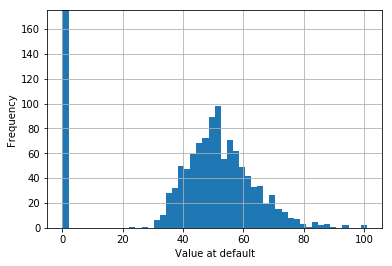

In [20]:
plt.hist(L * D * ST, bins = 50)
plt.xlabel('Value at default')
plt.ylabel('Frequency')
plt.grid(True)
plt.ylim(top=175)

In [9]:
# the number of non_loss
print(np.count_nonzero(ST * L * D))

1016


# Credit Value Adjustment for Call option

d:\language\python\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 350)

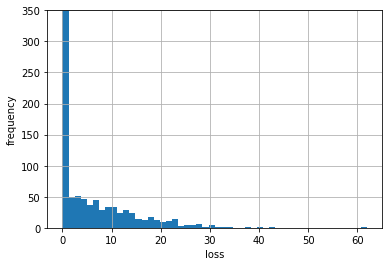

In [10]:
# Strike price
K = 100 
# payoff of call option
hT = np.maximum(ST - K, 0)
# present value of call option
C0 = np.exp(-rate * T) * 1 / I * np.sum(hT)
# present value of loss, discount and average of paths
CVA = np.exp(-rate * T) * 1 / I * np.sum(L * D * hT)
# value after credit risk adjustment
C1 = np.exp(-rate * T) * 1 / I * np.sum((1 - L * D) * hT)

plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(top=350)

In [11]:
# number of losses
print(np.count_nonzero(L * D * hT))
# number of defaults
print(np.count_nonzero(D))
# zero payoff
print(I - np.count_nonzero(hT))  

562
1016
44282


Options have different characteristics than conventional assets.
We only see losses due to a little greater than 500 callbacks.
But there are still about 1000 defaults.
This result results from the fact that there is a high probability that the option will return 0 at expiration.